In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [5]:
df = pd.read_csv("DATA\\2016-2023-cleaned-csv.csv", )
df

,Name,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,...,team,home,season,date,location,year,month,day,season_month,hour_float
0,andre_drummond,37.15,6,16,0,0,6,10,8,11,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
1,marcus_morris,37.08,6,19,1,4,5,6,5,5,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
2,kentavious_caldwell-pope,37.04,7,14,4,7,3,3,1,3,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
3,ersan_ilyasova,34.43,6,12,3,6,1,2,3,4,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
4,reggie_jackson,32.11,4,10,2,4,5,5,1,7,...,DET,0,2016,2015-10-27,"Philips Arena, Atlanta, Georgia",2015,10,27,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216399,aaron_gordon,28.65,1,6,0,2,2,4,2,5,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5
216400,bruce_brown,28.15,4,14,0,5,2,4,4,2,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5
216401,christian_braun,24.28,2,4,0,0,3,6,1,2,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5
216402,jeff_green,4.73,2,2,0,0,0,0,0,0,...,DEN,1,2023,2023-06-12,"Ball Arena, Denver, Colorado",2023,6,12,9,20.5


In [25]:
joel_embiid_2023 = df[(df['Name'] == 'joel_embiid') & (df['season'] == 2023)]
line = 29.5
colors = pd.Series(['green' if pts > line else 'red' for pts in joel_embiid_2023['PTS']])

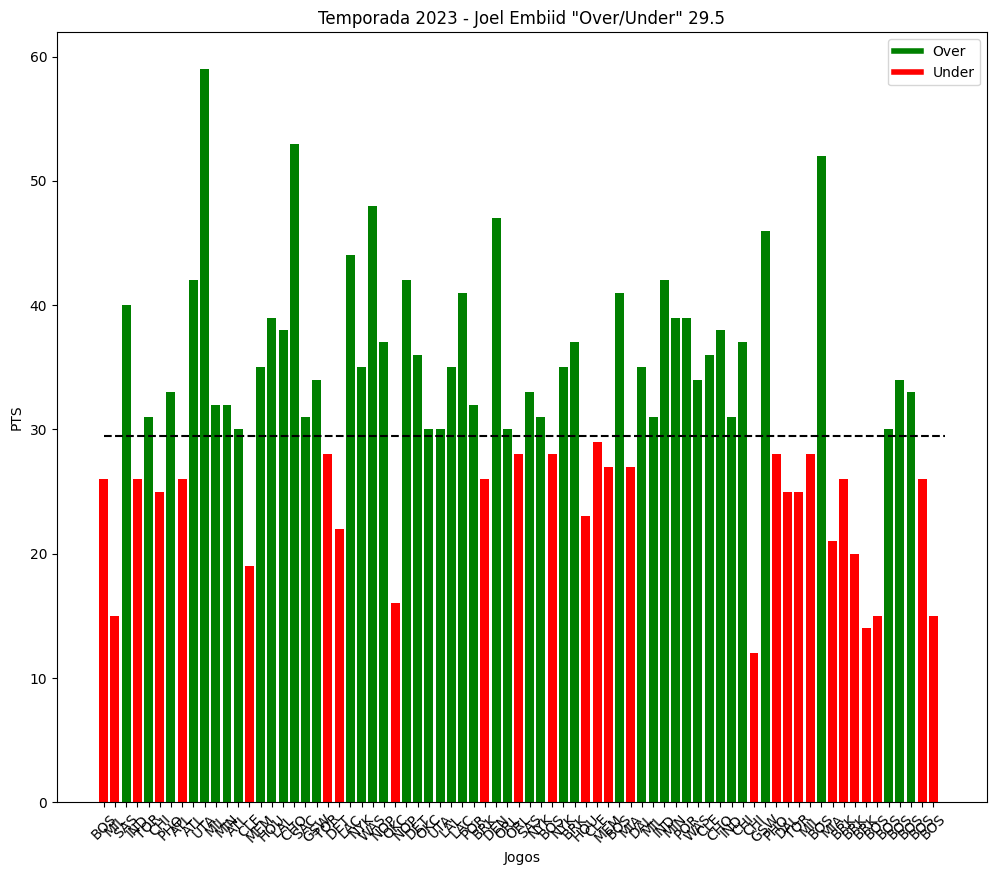

In [22]:
plt.figure(figsize=(12, 10))

plt.bar(range(len(joel_embiid_2023)), joel_embiid_2023['PTS'], color=colors)
plt.xticks(range(len(joel_embiid_2023)), joel_embiid_2023['opp'], rotation=45)
plt.plot([0, len(joel_embiid_2023)], [line, line], linestyle='--', color='black', label='29.5')
plt.xlabel('Jogos')
plt.ylabel('PTS')
plt.title('Temporada 2023 - Joel Embiid "Over/Under" 29.5')

legend_elements = [Line2D([0], [0], color='green', lw=4, label='Over'),
                   Line2D([0], [0], color='red', lw=4, label='Under')]
plt.legend(handles=legend_elements)

plt.show()

In [26]:
colors.value_counts()

green    47
red      28
Name: count, dtype: int64

In [29]:
from flask import Flask, render_template, make_response
import io
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [02/Nov/2023 19:28:12] "GET /grafico/nikola_jokic/29.5 HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2023 19:28:15] "GET /grafico/nikola_jokic/29.5 HTTP/1.1" 200 -
127.0.0.1 - - [02/Nov/2023 19:28:18] "GET /grafico/nikola_jokic/27.5 HTTP/1.1" 200 -


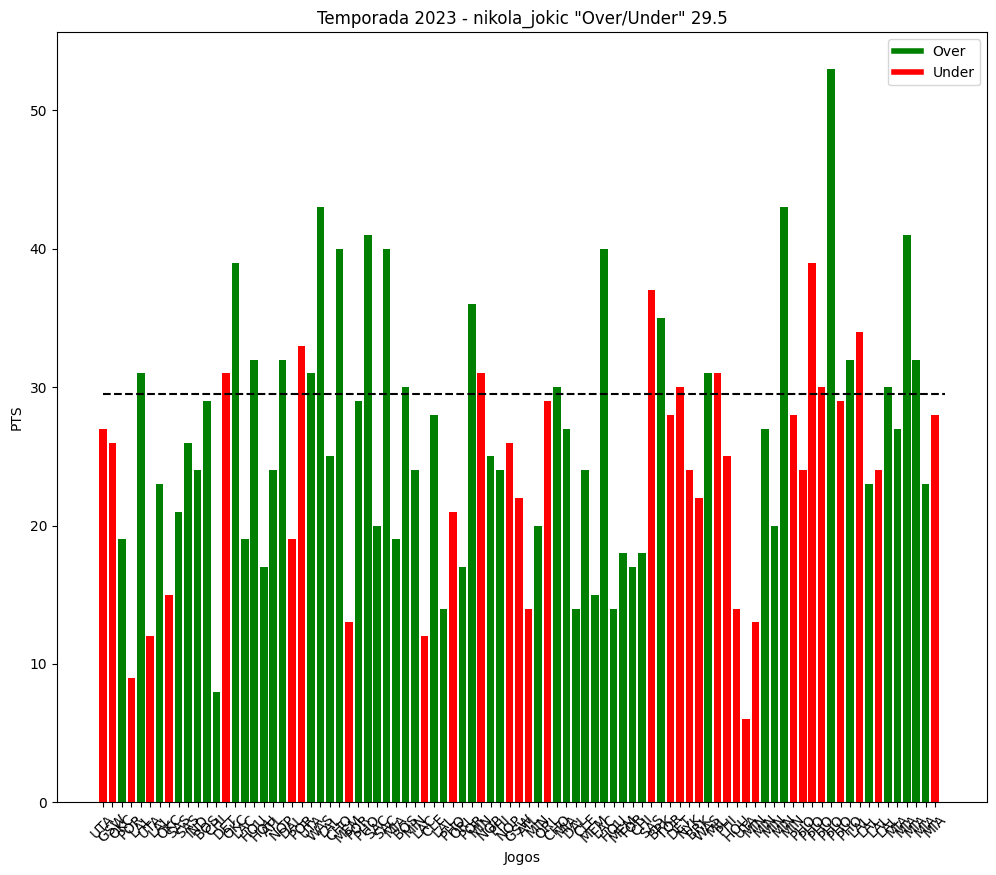

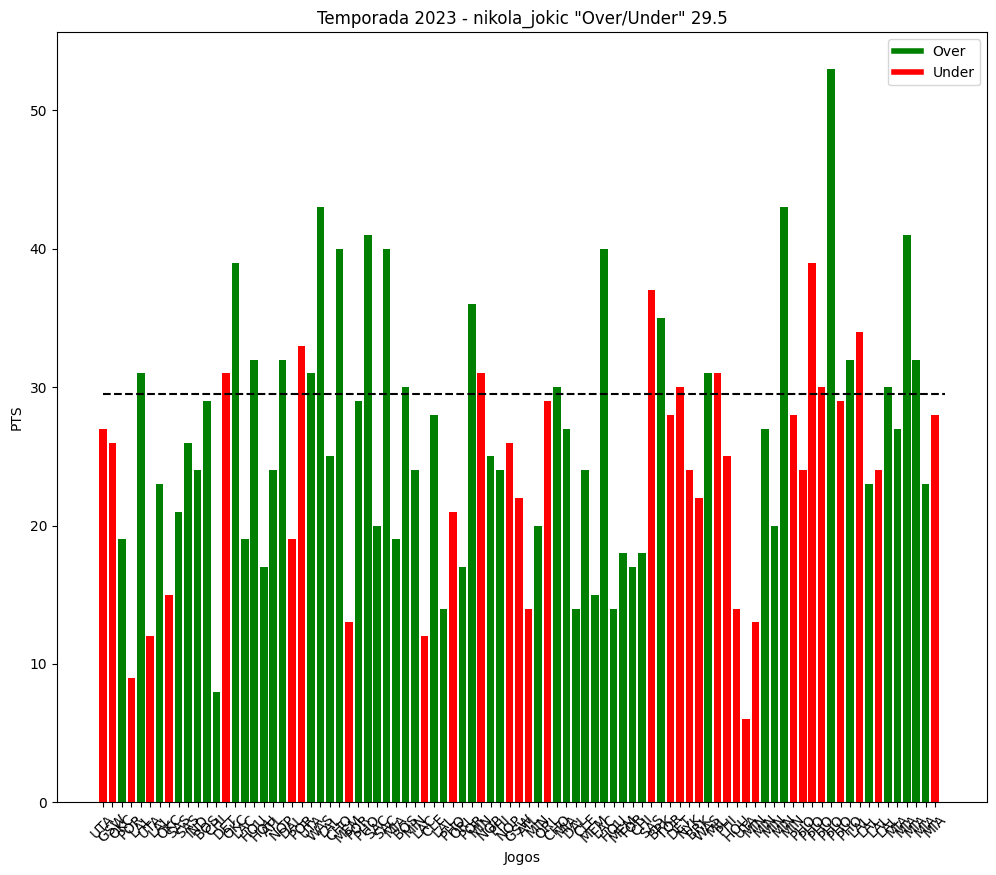

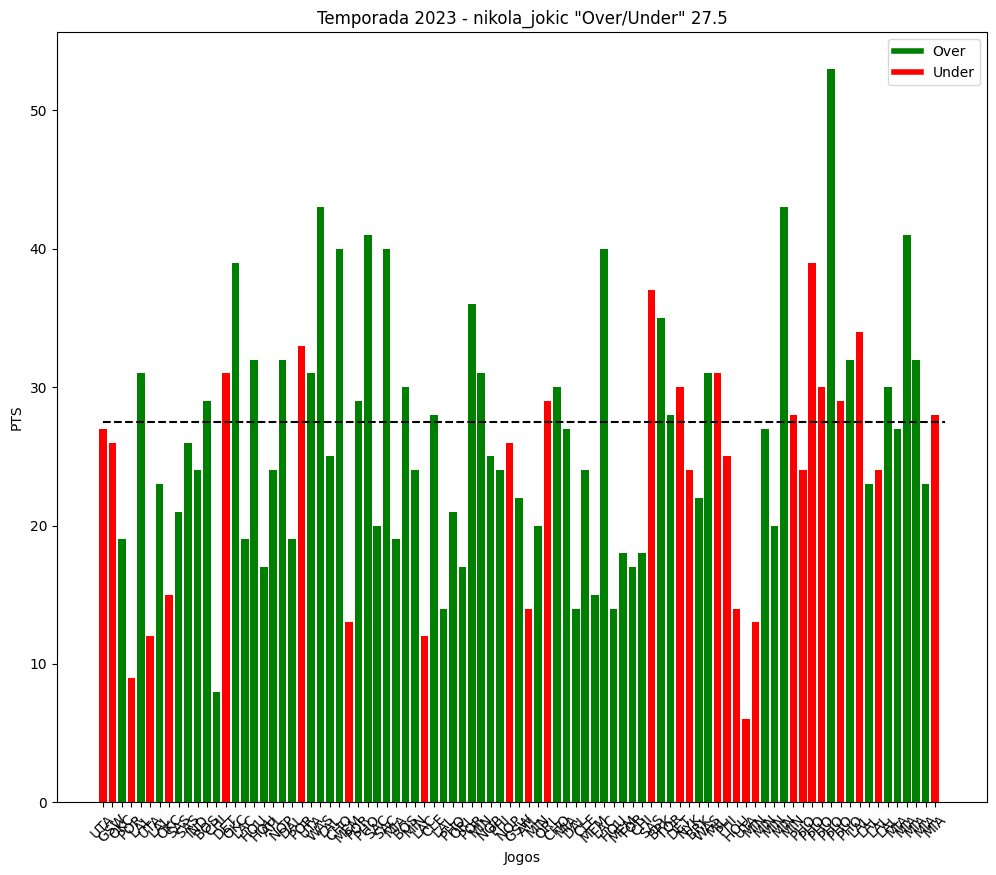

In [34]:
app = Flask(__name__)

# Coloque o código para criar o gráfico em uma função
def create_chart(player_name, line):
    player_df_2023 = df[(df['Name'] == player_name) & (df['season'] == 2023)]
    colors = pd.Series(['green' if pts > line else 'red' for pts in joel_embiid_2023['PTS']])


    plt.figure(figsize=(12, 10))

    plt.bar(range(len(player_df_2023)), player_df_2023['PTS'], color=colors)
    plt.xticks(range(len(player_df_2023)), player_df_2023['opp'], rotation=45)
    plt.plot([0, len(player_df_2023)], [line, line], linestyle='--', color='black', label='29.5')
    plt.xlabel('Jogos')
    plt.ylabel('PTS')
    plt.title(f'Temporada 2023 - {player_name} "Over/Under" {line}')
    
    legend_elements = [Line2D([0], [0], color='green', lw=4, label='Over'),
                       Line2D([0], [0], color='red', lw=4, label='Under')]
    plt.legend(handles=legend_elements)
    
    
    # Salvar o gráfico em uma imagem PNG
    output = io.BytesIO()
    FigureCanvas(plt.gcf()).print_png(output)
    return output

@app.route('/grafico/<player_name>/<line>')
def show_chart(player_name, line):
    # Chame a função para criar o gráfico
    chart = create_chart(player_name,float(line))
    
    # Crie uma resposta para exibir o gráfico na rota /grafico
    response = make_response(chart.getvalue())
    response.mimetype = 'image/png'
    
    return response

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)
